# Task 4: Denoising by spectral substraction

## **Team member**:  

    * BEHIDJ Ramzi *
    * Ousmane CISSE * 

### Formula use to generate different level of $SNR$

We will considere the signal $y$ a corrupted signal $x$ by some additive noise $n$, and $n= N*\sigma$
 $$ y = x + n$$ 
 Knowing x, the SNR ( Signal to Noise Ratio) is given by : 
 
&emsp;&emsp;&emsp;  $$SNR (y|x) = 10\log (\frac{||x||^2}{||x-y||^2})$$
 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;   $$= 10\log (\frac{||x||^2}{||x-(x-n)||^2})$$

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $$= 10\log (\frac{||x||^2}{||x-(x-n)||^2})$$
 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $$= 10\log (\frac{||x||^2}{||n||^2})$$
 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  $$= 10\log (\frac{||x||}{||N\sigma||^2})$$
 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  $$\frac{SNR }{10 }= \log(\frac{||x||^2}{||N^2\sigma^2||})$$
 
 **$$\frac{||x||^2}{||N^2\sigma^2||} = 10^{\frac{SNR}{10}}$$**
 
 **$$ \sigma^2 = \frac{||x||^2}{N^2*10^{\frac{SNR}{10}}}$$**
 $$ \sigma = \sqrt{ \frac{||x||^2}{N^2*10^{\frac{SNR}{10}}}}$$ 
 

### Importation of necessairy libraire

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio,clear_output
import numpy as np
import scipy.signal 
import scipy.fft as fft
import librosa

### Importation of differents audio files

In [2]:
# load the original music file
music_file_1 = "music.wav" # "selma.wav"
music_freq, music_wav = wavfile.read(music_file_1)
# music_wav = music_wav[:14000]
# load the noise1 file
noise_1 = "noise1.wav"
noise_1_freq, noise_1_wav = wavfile.read(noise_1)
# load the noise2 file
noise_2= "noise2.wav"
noise_2_freq, noise_2_wav = wavfile.read(noise_2)
# load the noise3 file
noise_3= "noise3.wav"
noise_3_freq, noise_3_wav = wavfile.read(noise_3)
# compute the duration of all file
n_1,n_2,n_3,n_4 = music_wav.size, noise_1_wav.size,noise_2_wav.size,noise_3_wav.size
duree_1,duree_2,duree_3,duree_4  = (1.0*n_1/music_freq),(1.0*n_2/noise_1_freq),(1.0*n_3/noise_2_freq),(1.0*n_4/noise_3_freq)
# Display the resume of informations about each file
liste_name = [music_file_1,noise_1,noise_2,noise_3]
liste_freq = [music_freq,noise_1_freq,noise_2_freq,noise_3_freq]
liste_duree = [duree_1,duree_2,duree_3,duree_4]
liste_taille = [n_1,n_2,n_3,n_4]
liste_audio = [music_wav,noise_1_wav,noise_2_wav,noise_3_wav]
for i in range(3):
    print(f"\n***************Audio file number {i}: {liste_name[i]}******* infos")
    print(f"File type : {type(liste_audio[i])} \nLength: {liste_taille[i]}")
    print(f"the duration is {liste_duree[i]} seconds sampled with {liste_freq[i]} Hz of sampling frequency")


***************Audio file number 0: music.wav******* infos
File type : <class 'numpy.ndarray'> 
Length: 140001
the duration is 8.7500625 seconds sampled with 16000 Hz of sampling frequency

***************Audio file number 1: noise1.wav******* infos
File type : <class 'numpy.ndarray'> 
Length: 140001
the duration is 8.7500625 seconds sampled with 16000 Hz of sampling frequency

***************Audio file number 2: noise2.wav******* infos
File type : <class 'numpy.ndarray'> 
Length: 140001
the duration is 8.7500625 seconds sampled with 16000 Hz of sampling frequency


In [3]:
def plot_temporal(data_wav,freq,name):
    periode = 1.0/freq # calcul de la période (l'inverse de la frequence)
    t = np.zeros(len(data_wav)) #  création de'un vecteur de zéros de la taille du fichier
    for k in range(len(data_wav)):
        t[k] = periode*k   # Répartition du vecteur temps 
    plt.figure(figsize=(12,4))
    plt.plot(t,data_wav)
    plt.title(name)
    plt.xlabel("t (s)")
    plt.ylabel("Amplitude") 
    plt.axis([0,5,data_wav.min(),data_wav.max()])
    plt.grid()

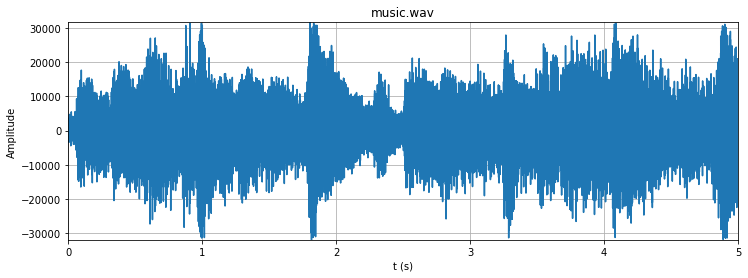

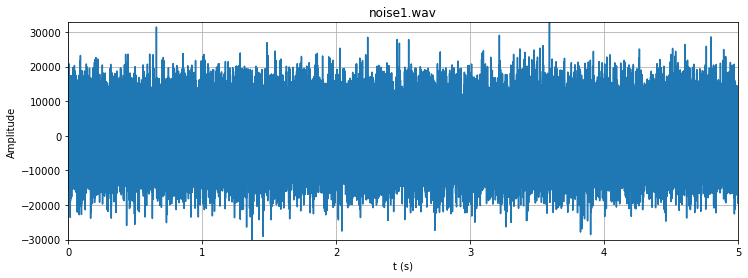

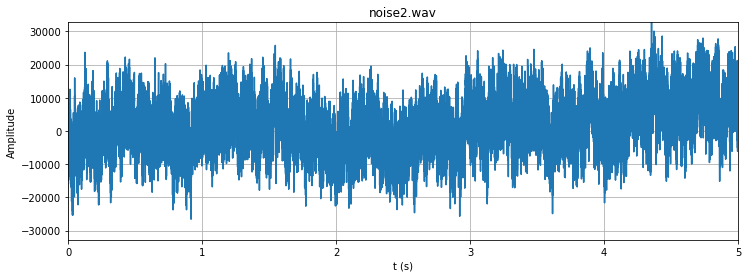

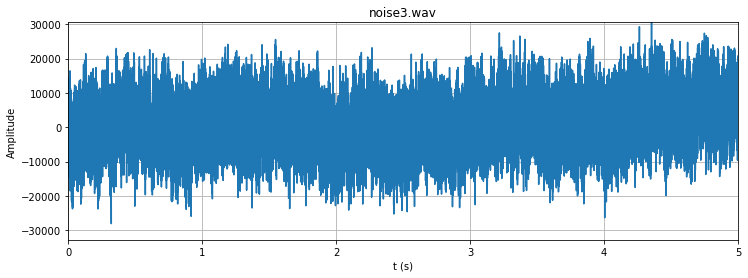

In [4]:
for x,y,z in zip(liste_audio,liste_freq,liste_name):
    plot_temporal(x,y,z)

In [5]:
# Original Audio
Audio(liste_audio[0], rate=liste_freq[0])

In [6]:
Audio(liste_audio[1], rate=liste_freq[1])

In [7]:
Audio(liste_audio[2], rate=liste_freq[2])

## Simulate a noisy version of the music using the noises at various SNR Level

In [8]:
snr=[1, 5,10,15,20,30,40,60]
#let determined the differentes sigma to sample the noise with differente SNR
sigma_vect_noise_1 = [np.sqrt((np.linalg.norm(noise_1_wav,ord=2)**2)/(n_1*10**(i/10))) for i in snr ]
sigma_vect_noise_2 = [np.sqrt((np.linalg.norm(noise_2_wav,ord=2)**2)/(n_1*10**(i/10))) for i in snr ]
sigma_vect_noise_3 = [np.sqrt((np.linalg.norm(noise_3_wav,ord=2)**2)/(n_1*10**(i/10))) for i in snr ]

In [9]:
# Let generate the noise with the differente sigma according with SNR
noise_1_vect = [ np.random.normal(0, i, len(music_wav)) for i in sigma_vect_noise_1]
noise_2_vect = [ np.random.normal(0, i, len(music_wav)) for i in sigma_vect_noise_2]
noise_3_vect = [ np.random.normal(0, i, len(music_wav)) for i in sigma_vect_noise_3]
# noising the original signal
music_with_noise_1_vect = [music_wav + i for i in noise_1_vect]
music_with_noise_2_vect = [music_wav + i for i in noise_2_vect]
music_with_noise_3_vect = [music_wav + i for i in noise_3_vect]

### Listen the audios with noises

In [10]:
#noise snr = 1
Audio(music_with_noise_1_vect[0], rate=music_freq)

In [11]:
#noise snr = 1
Audio(music_with_noise_2_vect[0], rate=music_freq)

In [12]:
#noise snr = 1
Audio(music_with_noise_3_vect[0], rate=music_freq)

In [13]:
#noise snr = 20
Audio(music_with_noise_1_vect[4], rate=music_freq)

In [14]:
#noise snr = 20
Audio(music_with_noise_2_vect[4], rate=music_freq)

In [15]:
#noise snr = 20
Audio(music_with_noise_3_vect[4], rate=music_freq)

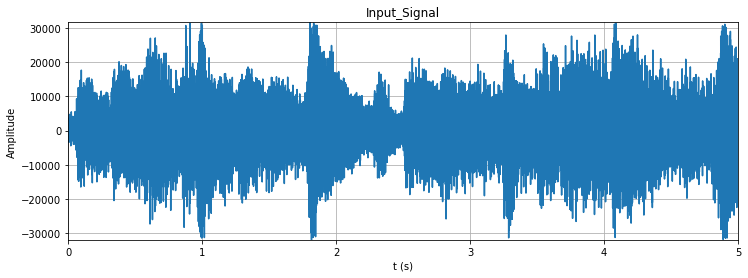

In [16]:
plot_temporal(music_wav,music_freq,"Input_Signal")

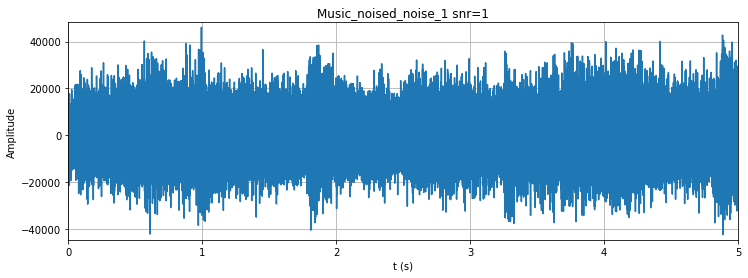

In [17]:
plot_temporal(music_with_noise_1_vect[0],music_freq,"Music_noised_noise_1 snr=1")

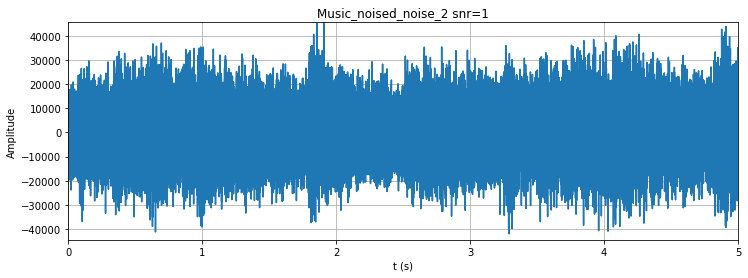

In [18]:
plot_temporal(music_with_noise_2_vect[0],music_freq,"Music_noised_noise_2 snr=1")

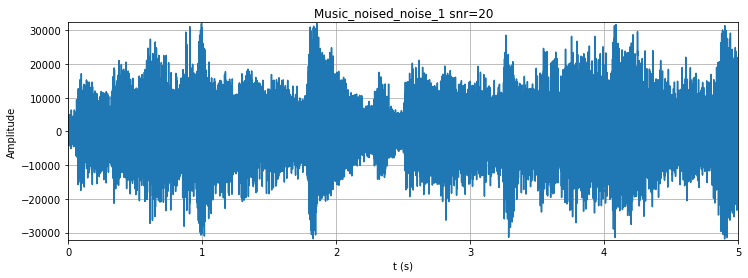

In [19]:
plot_temporal(music_with_noise_1_vect[4],music_freq,"Music_noised_noise_1 snr=20")

As you can see, the higher the snr, the less noise is heard, which corresponds to the theoretical definition of snr.

## Implement the spectral substraction method for denoising 

We will implement the following equation  for denoising:$$X(\tau, \upsilon) = Y(\tau, \upsilon) \left( 1- \frac{\lambda^2 |S_n(\upsilon)|^2}{|Y(\tau, \upsilon) |^2} \right)^+$$

In [20]:
def spectral_subtraction(noise,input_signal, nabda):
    N=librosa.stft(noise)
    noise_magnetitude = np.abs(N)
    Y= librosa.stft(input_signal)
    input_magnetitude = np.abs(Y)

    #spectral subtraction
    X_output = input_magnetitude* (1 - ((nabda**2)* (noise_magnetitude)**2/input_magnetitude**2 ))
    X= np.clip(X_output, a_min=0.0,a_max=None)
        
    #inverse STFT
    X_output = librosa.istft(X)
    return X_output
    

## Denoise the different given noisy version of the clean signal

### Test with random $\lambda$ parameter

### Noise_1

In [21]:
denoised_music_noise_1 = [spectral_subtraction(noise_1_vect[i],music_with_noise_1_vect[i],1) for i in range(0,len(noise_1_vect))]

In [22]:
Audio(denoised_music_noise_1[0], rate=music_freq)

In [23]:
Audio(denoised_music_noise_1[5], rate=music_freq)

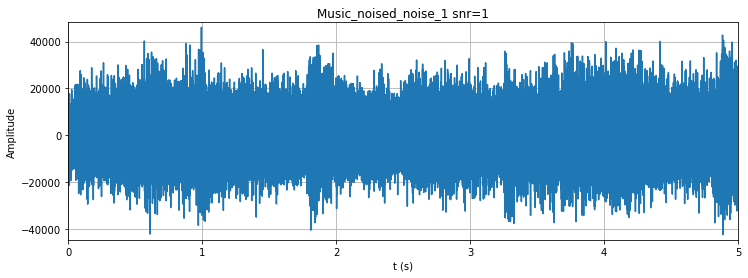

In [24]:
plot_temporal(music_with_noise_1_vect[0],music_freq,"Music_noised_noise_1 snr=1")

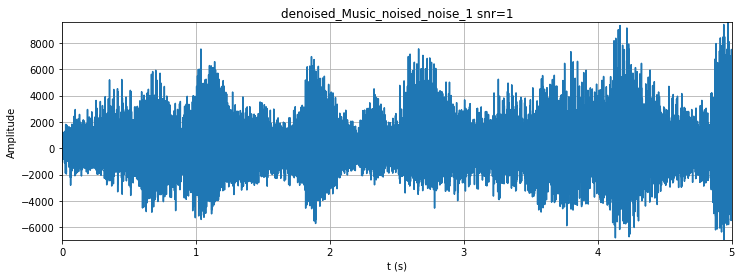

In [25]:
plot_temporal(denoised_music_noise_1[0],music_freq,"denoised_Music_noised_noise_1 snr=1")

We notice that denoising works quite well with this value $\lambda=1$.

### Variation of lambda parameter

In [26]:
def distance_to_original(original, vect_of_denoising):
    #taille = len(vect_of_denoising[i] - len(original))
    return -10*np.log10(np.linalg.norm(original,ord=2)**2/np.linalg.norm(original-vect_of_denoising[(len(vect_of_denoising) - len(original))],ord=2)**2)

In [40]:
def variation_param(snr,lim_lambda,noise_1_vect,music_with_noise_1_vect,music_wav):
    for i in range(len(snr)):
        distance =[]
        for lamda in np.arange(0,lim_lambda,0.1):
            distance.append(distance_to_original(music_wav,spectral_subtraction(noise_1_vect[i],music_with_noise_1_vect[i],lamda)))
        plt.plot(np.arange(0,lim_lambda,0.1),distance,label="snr="+str(snr[i]))
    plt.xlabel(r'Value of $\lambda$')
    plt.ylabel("Distance")
    plt.yscale("log")
    plt.title(r'Variation of $\lambda$ parameter')
    plt.legend()
    plt.show()

In [41]:
lim_lambda = 3

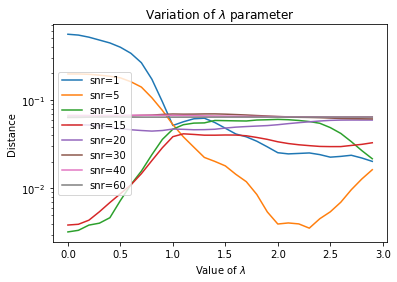

In [42]:
variation_param(snr,lim_lambda,noise_1_vect,music_with_noise_1_vect,music_wav)

## Discuss the parameter $\lambda$ for noise_1

For SNR above 20 (which is quite good quality), the graph shows us a stability that can be considered as a benchmark.With this noise, the range of value of $\lambda$ around 1 works well on all $SNR$.

### Noise_2

In [43]:
denoised_music_noise_2 = [spectral_subtraction(noise_2_vect[i],music_with_noise_2_vect[i],1) for i in range(0,len(noise_2_vect))]

In [44]:
Audio(denoised_music_noise_2[0], rate=music_freq)

In [51]:
Audio(denoised_music_noise_2[5], rate=music_freq)

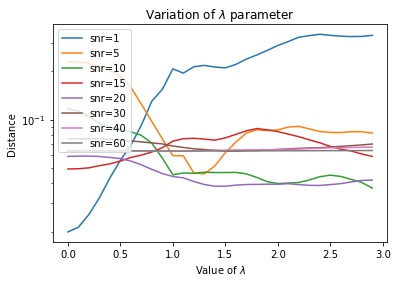

In [52]:
variation_param(snr,lim_lambda,noise_2_vect,music_with_noise_2_vect,music_wav)

## Discuss the parameter $\lambda$ for noise_2

With this noise we realize that it is a bit more difficult to find a value of $\lambda$ that works well on all the $SNR$. The best range of $\lambda$ is between 0.5 and 1.

### Noise_3

In [53]:
denoised_music_noise_3 = [spectral_subtraction(noise_3_vect[i],music_with_noise_3_vect[i],1) for i in range(0,len(noise_3_vect))]

In [54]:
Audio(denoised_music_noise_3[0], rate=music_freq)

In [55]:
Audio(denoised_music_noise_3[5], rate=music_freq)

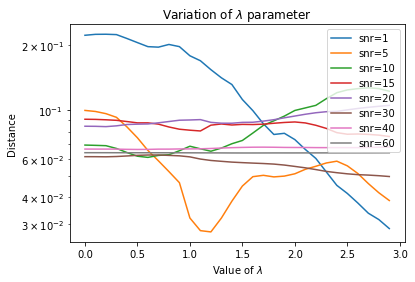

In [56]:
variation_param(snr,lim_lambda,noise_3_vect,music_with_noise_3_vect,music_wav)

## Discuss the parameter $\lambda$ for noise_3

With this noise we realize that it is more difficult to find a value of $lambda$ that works well on all $SNR$. And the good interval would be between 1.60 and 2.0